<a href="https://colab.research.google.com/github/Looma1116/Kaggle-Study_Seungjoon_Lee/blob/main/w11_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Singlevariable Linear Regression

In [2]:
import torch
import torch.optim as optim

torch.manual_seed(1106)

## Data

In [ ]:
x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[1],[2],[3]])

print(x_train)
print(x_train.shape)
print(y_train)
print(y_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])
tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])


## Weight & Bias Init

In [ ]:
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
print(W)

tensor([0.], requires_grad=True)


## Hypothesis
image.png

In [ ]:
H = x_train * W + b
print(H)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


## Cost
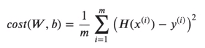

In [ ]:
cost = torch.mean((H - y_train)**2)
print(cost)

tensor(4.6667, grad_fn=<MeanBackward0>)


## Gradient Descent

In [ ]:
optimizer = optim.SGD([W,b], lr=0.01)

optimizer.zero_grad() #옵티마이저 초기화
cost.backward() #미분 계산
optimizer.step() #옵티마이저 갱신 

print(W,b)

tensor([0.0933], requires_grad=True) tensor([0.0400], requires_grad=True)


## Check

In [ ]:
H = x_train * W +b
print(H)

cost = torch.mean((H - y_train)**2)
print(cost)

tensor([[0.1333],
        [0.2267],
        [0.3200]], grad_fn=<AddBackward0>)
tensor(3.6927, grad_fn=<MeanBackward0>)


## Full Code with Iteration

In [ ]:
#Data
x_train = torch.FloatTensor([[2],[4],[6]])
y_train = torch.FloatTensor([[1],[2],[3]])

#Init
W = torch.zeros(1,requires_grad=True)
b = torch.zeros(1, requires_grad=True)

#Optimizer
Op = optim.SGD([W,b], lr=0.01)

nb_epoch = 1000

for epoch in range(nb_epoch+1):
  H = x_train * W + b
  cost = torch.mean((H - y_train)**2)

  Op.zero_grad()
  cost.backward()
  Op.step()

  if epoch % 100 == 0:
    print('Epoch:{}/{}, W:{:.3f}, b:{:.3f}, cost:{:.6f}'.format(epoch, nb_epoch,W.item(),b.item(),cost.item()))




Epoch:0/1000, W:0.187, b:0.040, cost:4.666667
Epoch:100/1000, W:0.483, b:0.078, cost:0.000880
Epoch:200/1000, W:0.487, b:0.060, cost:0.000509
Epoch:300/1000, W:0.490, b:0.045, cost:0.000295
Epoch:400/1000, W:0.493, b:0.034, cost:0.000170
Epoch:500/1000, W:0.494, b:0.026, cost:0.000099
Epoch:600/1000, W:0.496, b:0.020, cost:0.000057
Epoch:700/1000, W:0.497, b:0.015, cost:0.000033
Epoch:800/1000, W:0.498, b:0.012, cost:0.000019
Epoch:900/1000, W:0.498, b:0.009, cost:0.000011
Epoch:1000/1000, W:0.499, b:0.007, cost:0.000006


# Handwriting

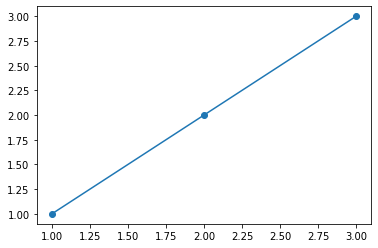

In [4]:
import matplotlib.pyplot as plt
import numpy as np

x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[1],[2],[3]])

plt.scatter(x_train, y_train)
xs = np.linspace(1,3,1000)
plt.plot(xs,xs)

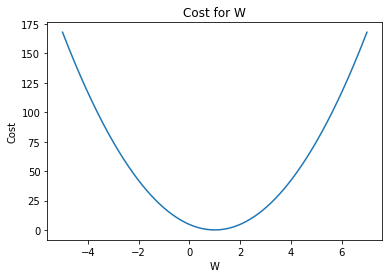

In [26]:
W_l = np.linspace(-5,7,1000)
cost_l = []

for W in W_l:
  Hypothesis = W*x_train
  cost = torch.mean((Hypothesis-y_train)**2)
  cost_l.append(cost.item())

plt.plot(W_l, cost_l)
plt.xlabel('W')
plt.ylabel('Cost')
plt.title('Cost for W')
plt.show()

## Gradient Descent

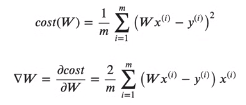

In [27]:
grad = torch.sum((W * x_train - y_train)*x_train) #2/m 생략 가능
print(W)

7.0


image.png

In [28]:
lr = 0.1
W -= lr * grad
print(W)

tensor(-1.4000)


In [29]:
for epoch in range(10):
  Hypothesis = W*x_train
  cost = torch.mean((Hypothesis-y_train)**2)
  grad = torch.sum((Hypothesis - y_train)*x_train)
  W -= lr * grad

  print('Epoch: {:2d}, W:{:.3f}, cost:{:.3f}'.format(epoch+1, W.item(), cost))

Epoch:  1, W:1.960, cost:26.880
Epoch:  2, W:0.616, cost:4.301
Epoch:  3, W:1.154, cost:0.688
Epoch:  4, W:0.939, cost:0.110
Epoch:  5, W:1.025, cost:0.018
Epoch:  6, W:0.990, cost:0.003
Epoch:  7, W:1.004, cost:0.000
Epoch:  8, W:0.998, cost:0.000
Epoch:  9, W:1.001, cost:0.000
Epoch: 10, W:1.000, cost:0.000


# Multivariable Linear Regression

In [30]:
torch.manual_seed(1106)


## Naive Data Representation

In [176]:
x_train = torch.FloatTensor([[73,80,79,71],
                            [93,88,90,89],
                            [69,81,79,74],
                            [46,58,46,66],
                            [72,76,75,77]])
y_train=torch.FloatTensor([[75],[92],[75],[52],[77]])

In [177]:
W = torch.zeros(4,1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W,b], lr = 2e-5)

nb_epochs = 100001

for epoch in range(nb_epochs+1):
  H = x_train.matmul(W) + b
  cost = torch.mean((H-y_train)**2)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 5000 ==0:
    print('Epoch:{:5d}/{}, H:{}, cost:{:.6f}'.format(epoch, nb_epochs,H.squeeze().detach(),cost.item()))


Epoch:    0/100001, H:tensor([0., 0., 0., 0., 0.]), cost:5669.399902
Epoch: 5000/100001, H:tensor([75.7126, 92.4097, 74.8961, 52.4481, 75.5709]), cost:0.585911
Epoch:10000/100001, H:tensor([75.5685, 92.4235, 74.9345, 52.3973, 75.6977]), cost:0.472130
Epoch:15000/100001, H:tensor([75.4576, 92.4057, 74.9940, 52.3521, 75.8035]), cost:0.385936
Epoch:20000/100001, H:tensor([75.3611, 92.3896, 75.0465, 52.3127, 75.8957]), cost:0.320349
Epoch:25000/100001, H:tensor([75.2770, 92.3755, 75.0922, 52.2784, 75.9761]), cost:0.270435
Epoch:30000/100001, H:tensor([75.2037, 92.3632, 75.1321, 52.2484, 76.0462]), cost:0.232447
Epoch:35000/100001, H:tensor([75.1397, 92.3525, 75.1669, 52.2222, 76.1074]), cost:0.203533
Epoch:40000/100001, H:tensor([75.0838, 92.3431, 75.1972, 52.1994, 76.1608]), cost:0.181529
Epoch:45000/100001, H:tensor([75.0352, 92.3349, 75.2236, 52.1795, 76.2074]), cost:0.164775
Epoch:50000/100001, H:tensor([74.9927, 92.3278, 75.2467, 52.1622, 76.2481]), cost:0.152019
Epoch:55000/100001, H

tensor([49.0193], grad_fn=<AddBackward0>)


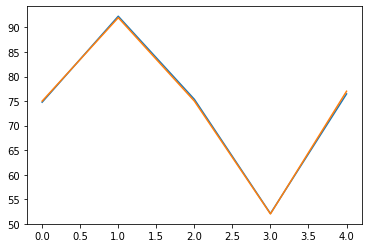

In [172]:
plt.plot(H.squeeze().detach())
plt.plot(y_train)
x_test = torch.FloatTensor([14,20,50,31])

print(x_test@W+b)

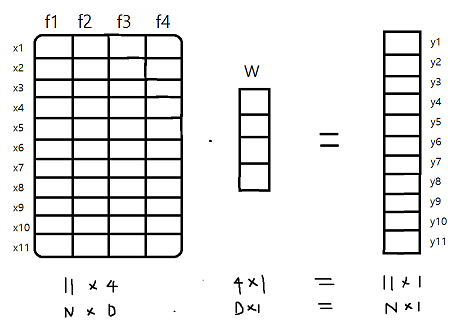